In [41]:
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv
from numpy.linalg import norm
from matplotlib import pyplot as plt
import math

Input space: $X = [-1,1] \subset R^1$

Function f: $f: X \to R \: : \: \: ||f||_k < \infty$


### Q5a

RKHS induced by linear kernel k, $k(u,v) = u \cdot v$

Note: $u,v \in X$

The RKHS of the linear kernel is the set of linear functions of the form:

$f_{W}(x) = Wx$

In [42]:
X = np.arange(-1,1 + 0.001,0.001)

def linear(X,w):
    return [w*x for x in X]

y1 = linear(X,0.5)
y2 = linear(X,1)
y3 = linear(X,2)

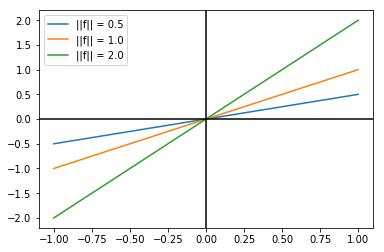

In [43]:
plt.plot(X,y1,label="||f|| = 0.5")
plt.plot(X,y2,label="||f|| = 1.0")
plt.plot(X,y3,label="||f|| = 2.0")

plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')

plt.legend()
plt.show()

#### Comments

Refer to the legend above for the norm of the functions. The norm of the functions are equivalent to the slope of the function $f$

### Q5b

RKHS induced by gaussian kernel k, $k_\rho(u,v) = e^{-\frac{(u-v)^2}{2\rho^2}}$

f belongs to $\kappa$ if $||f||^2_\kappa = ||w||^2 < \infty$

Thus, $||w||^2 = w_1^2 + w_2^2 + \dots$

For each $\rho$, I'll do $w_i = \frac{1}{i}$, since $||w||^2 = \sum_{i=1}^{\infty} \frac{1}{i^2} = \frac{\pi^2}{6}$

For each $\rho$, I'll do $||w||^2 = \sum_{i=1}^{\infty} \frac{1}{4i^2} = \frac{\pi^2}{24}$

For each $\rho$, I'll do $||w||^2 = \sum_{i=1}^{\infty} \frac{4}{i^2} = \frac{2\pi^2}{3}$

In [44]:
X = np.arange(-1,1 + 0.001,0.001)

def gaussianExpansion(x,p,w,i):
    val = w(i) * math.exp((-(x**2))/(2*p**2))
    val = val * (x**(i-1))
    val = val / (p**(i-1))
    val = val / (math.sqrt(math.factorial(i-1)))
    return val

def weight1(i):
    return (1/i)

def weight2(i):
    return 1/(2*i)

def weight3(i):
    return 2/(i)

def gaussian(x,p,w):
    return sum([gaussianExpansion(x,p,w,i) for i in range(1,151)])

y1 = [gaussian(x,0.1,weight1) for x in X]
y2 = [gaussian(x,0.1,weight2) for x in X]
y3 = [gaussian(x,0.1,weight3) for x in X]

y4 = [gaussian(x,0.5,weight1) for x in X]
y5 = [gaussian(x,0.5,weight2) for x in X]
y6 = [gaussian(x,0.5,weight3) for x in X]

y7 = [gaussian(x,1.0,weight1) for x in X]
y8 = [gaussian(x,1.0,weight2) for x in X]
y9 = [gaussian(x,1.0,weight3) for x in X]

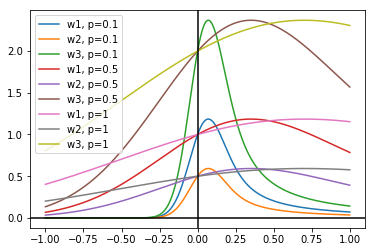

In [45]:
plt.plot(X,y1,label="w1, p=0.1")
plt.plot(X,y2,label="w2, p=0.1")
plt.plot(X,y3,label="w3, p=0.1")

plt.plot(X,y4,label="w1, p=0.5")
plt.plot(X,y5,label="w2, p=0.5")
plt.plot(X,y6,label="w3, p=0.5")

plt.plot(X,y7,label="w1, p=1")
plt.plot(X,y8,label="w2, p=1")
plt.plot(X,y9,label="w3, p=1")

plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')

plt.legend()
plt.show()

As one can see, as $\rho$ increases, the bandwidth (radius of information sharing) increases. As the norm increases, the top of the gaussian goes higher. Thus, the higher the norm, the more variation can be modelled (at the cost of smoothness). 

### Q5c

$\hat{f} = k(x)^T(K + \lambda*I_m)^{-1}y$

I'll be using a gaussian kernel, so I'll use a $\rho = 0.2$

In [192]:
x = genfromtxt('hw1-q5x.csv', delimiter=',')
y = genfromtxt('hw1-q5y.csv', delimiter=',')
l = [0.1, 1, 10]
p = 0.2

In [193]:
# Sort data, for viewing
x_col = np.array(x).reshape(len(x),1)
y_col = np.array(y).reshape(len(y),1)
data = np.hstack((x_col,y_col))
data

array([[-0.27272727, -0.66041818],
       [-0.49494949, -0.53583508],
       [-0.03030303,  0.89707809],
       [-0.27272727, -0.60449383],
       [-0.71717172, -0.590515  ],
       [-0.25252525, -0.56592143],
       [-0.53535354, -0.43152984],
       [-0.43434343, -0.27091645],
       [-0.45454545, -0.4510463 ],
       [ 0.5       , -0.55322446]])

In [194]:
data_sorted = data[data[:,0].argsort()]
x = data_sorted[:,0]
y = data_sorted[:,1]

In [195]:
# Let x',y' be N-1 samples
x_prime = x[0:-1]
y_prime = y[0:-1]

In [196]:
def k(kernel,X):
    def F(x):
        return np.array([kernel(x,X[i]) for i in range(len(X))]).reshape(len(X),1)
    return F

def K(kernel,X):
    arr = np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            arr[i][j] = kernel(X[i],X[j])     
    return arr

def gaussianKernel(x,y):
    return math.exp(-(((x-y)**2)/(2*(p**2))))

def posteriorMean(X,Y,kernel,lamb):
    reg = np.identity(len(X))*lamb
    def F(x):
        return np.dot(np.dot(np.transpose(k(kernel,X)(x)),inv((K(kernel,X) + reg))),Y)
    return F

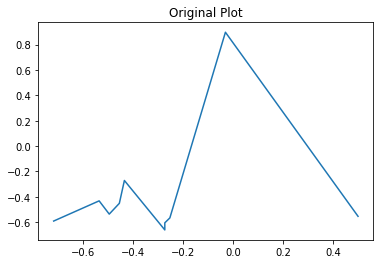

In [197]:
plt.plot(x,y)
plt.title("Original Plot")
plt.show()

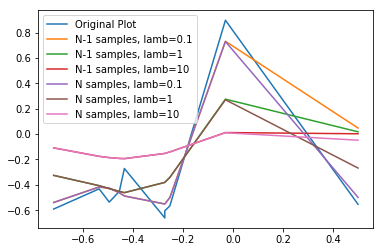

In [198]:
# N - 1
plt.plot(x,y,label="Original Plot")

for lamb in l:
    f_hat = posteriorMean(x_prime,y_prime,gaussianKernel,lamb)
    y_new = [f_hat(x[i]) for i in range(len(x))]
    plt.plot(x,y_new,label="N-1 samples, lamb=" + str(lamb))

for lamb in l:
    f_hat = posteriorMean(x,y,gaussianKernel,lamb)
    y_new = [f_hat(x[i]) for i in range(len(x))]
    plt.plot(x,y_new,label="N samples, lamb=" + str(lamb))
    
plt.legend()
plt.show()

#### Comments

Firstly, one can see that information gain is inversely proportional to $\lambda$, as larger $\lambda$ limits the change in the function from the contribution of samples.

The largest information gain is for $\lambda = 0.1$. The orange line deviates significantly from the function at 0.5, since the Gaussian Process hasn't seen $f(x)$ when $x = 5$. After seeing the Nth example, the purple line ($\lambda = 0.1$) fits better the original plot (a lot of information has been gained, for, since $\lambda$ is small, the additional point contributes to a significant change in the function. 